In [64]:
import bs4 as bs
import requests

import tiingoconnect
import pandas as pd
import datetime as dt
import os
pd.core.common.is_list_like = pd.api.types.is_list_like


import pandas_datareader.data as web
import numpy as np


def DJIA_tickers():
    '''
    Parses Slickcharts Webpage to obtain the tickers for each current listed stock in the DJIA.
    '''

    resp = requests.get('https://money.cnn.com/data/dow30/')
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find('table', {'class': 'wsod_dataTable wsod_dataTableBig'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        ticker = ticker.split('\xa0', 1)[0]
        tickers.append(ticker)

    return tickers






In [65]:
DJIA_tickers()

['MMM',
 'AXP',
 'AAPL',
 'BA',
 'CAT',
 'CVX',
 'CSCO',
 'KO',
 'DIS',
 'DWDP',
 'XOM',
 'GS',
 'HD',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'MCD',
 'MRK',
 'MSFT',
 'NKE',
 'PFE',
 'PG',
 'TRV',
 'UTX',
 'UNH',
 'VZ',
 'V',
 'WMT',
 'WBA']

In [ ]:
def API_data():
    '''
    Uses Tiingo API to access all the historical data for the current stocks listed in the DJIA.
    '''
    DJIA = '.DJI'
    tickers = DJIA_tickers()
    tickers.append(DJIA)

    if not os.path.exists('stocks_DJIA'):
        os.makedirs('stocks_DJIA')

    start = dt.datetime(2000,1,1)
    end = dt.datetime.now()

    for ticker in tickers:
        print(ticker)
        if not os.path.exists('stock_DJIA/{}.csv'.format(ticker)):
            df = tiingoconnect.DataReader(ticker, start, end)
            df.to_csv('stocks_DJIA/{}.csv'.format(ticker))
        else:
            print('Information already acquired for {}'.format(ticker))




In [ ]:
API_data()

MMM
AXP
AAPL
BA
CAT
CVX
CSCO
KO
DIS
DWDP
XOM
GS
HD
IBM
INTC
JNJ
JPM
MCD


In [ ]:
def compile_data():
    '''
    Creates a dataframe with the compiled adjusted closing for all the stocks in the DJIA.
    '''

    tickers = DJIA_tickers()

    main_df = pd.DataFrame()

    for count,ticker in enumerate(tickers):
        df = pd.read_csv('stocks_DJIA/{}.csv'.format(ticker))
        df.set_index('Date', inplace= True)

        df.rename(columns = {'Adj Close': ticker}, inplace=True)

        df.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'], 1, inplace=True)

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')

        if count % 10 == 0:
            print(count)

    print(main_df.head())
    main_df.to_csv('DJIA_adjcloses.csv')



In [ ]:
 compile_data()

In [1]:
import math
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from scipy.stats import randint as sp_randint

from sklearn.decomposition import PCA

style.use("ggplot")

In [2]:
# loading the data
df = pd.read_csv('DJIA_adjcloses.csv', parse_dates=True, index_col=0)

# Visualizing the dataframe
print(df.head())

                                 MMM        AXP      AAPL         BA  \
Date                                                                   
2000-01-03 00:00:00+00:00  29.638778  35.476634  3.515516  26.515731   
2000-01-04 00:00:00+00:00  28.461140  34.134275  3.219049  26.476146   
2000-01-05 00:00:00+00:00  29.911990  33.959430  3.266157  28.330070   
2000-01-06 00:00:00+00:00  31.654893  33.959430  2.983509  28.409241   
2000-01-07 00:00:00+00:00  32.282966  34.433913  3.124833  29.233940   

                                 CAT        CVX       CSCO         KO  \
Date                                                                    
2000-01-03 00:00:00+00:00  14.560887  21.366859  43.003876  16.836220   
2000-01-04 00:00:00+00:00  14.372251  21.366859  40.577200  16.893089   
2000-01-05 00:00:00+00:00  14.914205  21.829301  40.895453  17.078662   
2000-01-06 00:00:00+00:00  15.459153  22.674982  39.781569  17.060703   
2000-01-07 00:00:00+00:00  15.962182  23.073550  42.12868

In [3]:
df.isnull()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03 00:00:00+00:00,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2000-01-04 00:00:00+00:00,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2000-01-05 00:00:00+00:00,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2000-01-06 00:00:00+00:00,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2000-01-07 00:00:00+00:00,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2000-01-10 00:00:00+00:00,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2000-01-11 00:00:00+00:00,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2000-01-12 00:00:00+00:00,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2000-01-13 00:00:00+00:00,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [4]:
df.isnull().sum()

MMM        0
AXP        0
AAPL       0
BA         0
CAT        0
CVX        0
CSCO       0
KO         0
DIS        0
DWDP    4441
XOM        0
GS         0
HD         0
IBM        0
INTC       0
JNJ        0
JPM        0
MCD        0
MRK        0
MSFT       0
NKE        0
PFE        0
PG         0
TRV        0
UTX        0
UNH        0
VZ         0
V       2063
WMT        0
WBA        0
dtype: int64

In [5]:
df.isnull().values.any()

True

In [6]:
df.shape

(4830, 30)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4830 entries, 2000-01-03 00:00:00+00:00 to 2019-03-15 00:00:00+00:00
Data columns (total 30 columns):
MMM     4830 non-null float64
AXP     4830 non-null float64
AAPL    4830 non-null float64
BA      4830 non-null float64
CAT     4830 non-null float64
CVX     4830 non-null float64
CSCO    4830 non-null float64
KO      4830 non-null float64
DIS     4830 non-null float64
DWDP    389 non-null float64
XOM     4830 non-null float64
GS      4830 non-null float64
HD      4830 non-null float64
IBM     4830 non-null float64
INTC    4830 non-null float64
JNJ     4830 non-null float64
JPM     4830 non-null float64
MCD     4830 non-null float64
MRK     4830 non-null float64
MSFT    4830 non-null float64
NKE     4830 non-null float64
PFE     4830 non-null float64
PG      4830 non-null float64
TRV     4830 non-null float64
UTX     4830 non-null float64
UNH     4830 non-null float64
VZ      4830 non-null float64
V       2767 non-null float64
WMT   

In [8]:
df.head()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03 00:00:00+00:00,29.638778,35.476634,3.515516,26.515731,14.560887,21.366859,43.003876,16.836220,23.522220,NaN,...,4.689344,16.746856,32.227726,20.041104,21.193539,5.819283,22.564221,NaN,47.083534,21.581551
2000-01-04 00:00:00+00:00,28.461140,34.134275,3.219049,26.476146,14.372251,21.366859,40.577200,16.893089,24.899860,NaN,...,4.434022,16.121738,31.596399,19.773889,20.325451,5.744580,21.833915,NaN,45.321690,20.780555
2000-01-05 00:00:00+00:00,29.911990,33.959430,3.266157,28.330070,14.914205,21.829301,40.895453,17.078662,25.781550,NaN,...,4.690318,16.415912,31.325831,19.968227,20.135557,5.731588,22.564221,NaN,44.264583,20.969469
2000-01-06 00:00:00+00:00,31.654893,33.959430,2.983509,28.409241,15.459153,22.674982,39.781569,17.060703,24.899860,NaN,...,4.665956,16.972739,32.438168,20.004665,20.874788,5.941623,22.449405,NaN,44.884752,20.402727
2000-01-07 00:00:00+00:00,32.282966,34.433913,3.124833,29.233940,15.962182,23.073550,42.128682,18.183118,24.506249,NaN,...,4.665956,18.123166,35.023602,20.800236,21.702184,6.637772,22.282692,NaN,48.274541,20.924130


In [9]:
df.columns

Index(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'DWDP',
       'XOM', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT',
       'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'V', 'WMT', 'WBA'],
      dtype='object')

In [10]:
# Dropping 'Not a Number' columns for Dow Chemicals (DWDP) and Visa (V)
df.drop(['DWDP', 'V'], axis=1, inplace=True)

In [11]:
# Copying the dataframe to add features
data = pd.DataFrame(df.copy())

In [12]:
data.columns

Index(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'XOM',
       'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE',
       'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'WMT', 'WBA'],
      dtype='object')

In [13]:
data.head()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03 00:00:00+00:00,29.638778,35.476634,3.515516,26.515731,14.560887,21.366859,43.003876,16.836220,23.522220,23.600648,...,37.972085,4.689344,16.746856,32.227726,20.041104,21.193539,5.819283,22.564221,47.083534,21.581551
2000-01-04 00:00:00+00:00,28.461140,34.134275,3.219049,26.476146,14.372251,21.366859,40.577200,16.893089,24.899860,23.148586,...,36.688540,4.434022,16.121738,31.596399,19.773889,20.325451,5.744580,21.833915,45.321690,20.780555
2000-01-05 00:00:00+00:00,29.911990,33.959430,3.266157,28.330070,14.914205,21.829301,40.895453,17.078662,25.781550,24.299838,...,37.076210,4.690318,16.415912,31.325831,19.968227,20.135557,5.731588,22.564221,44.264583,20.969469
2000-01-06 00:00:00+00:00,31.654893,33.959430,2.983509,28.409241,15.459153,22.674982,39.781569,17.060703,24.899860,25.674106,...,35.835015,4.665956,16.972739,32.438168,20.004665,20.874788,5.941623,22.449405,44.884752,20.402727
2000-01-07 00:00:00+00:00,32.282966,34.433913,3.124833,29.233940,15.962182,23.073550,42.128682,18.183118,24.506249,25.598762,...,36.304128,4.665956,18.123166,35.023602,20.800236,21.702184,6.637772,22.282692,48.274541,20.924130


In [14]:

# Daily Returns
# Daily Log Returns (%)
# datareturns = np.log(data / data.shift(1)) 

# Daily Linear Returns (%)
datareturns = data.pct_change(1)

In [15]:
print(datareturns.head())

                                MMM       AXP      AAPL        BA       CAT  \
Date                                                                          
2000-01-03 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2000-01-04 00:00:00+00:00 -0.039733 -0.037838 -0.084331 -0.001493 -0.012955   
2000-01-05 00:00:00+00:00  0.050976 -0.005122  0.014634  0.070022  0.037708   
2000-01-06 00:00:00+00:00  0.058268  0.000000 -0.086538  0.002795  0.036539   
2000-01-07 00:00:00+00:00  0.019841  0.013972  0.047368  0.029029  0.032539   

                                CVX      CSCO        KO       DIS       XOM  \
Date                                                                          
2000-01-03 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2000-01-04 00:00:00+00:00  0.000000 -0.056429  0.003378  0.058568 -0.019155   
2000-01-05 00:00:00+00:00  0.021643  0.007843  0.010985  0.035409  0.049733   
2000-01-06 00:00:00+00:00  0.038741 -0.027237 -0.00

In [16]:
# Data Raw
data_raw = datareturns


In [17]:
data_raw.dropna(how='all', inplace=True)

In [18]:
print(data_raw.head())

                                MMM       AXP      AAPL        BA       CAT  \
Date                                                                          
2000-01-04 00:00:00+00:00 -0.039733 -0.037838 -0.084331 -0.001493 -0.012955   
2000-01-05 00:00:00+00:00  0.050976 -0.005122  0.014634  0.070022  0.037708   
2000-01-06 00:00:00+00:00  0.058268  0.000000 -0.086538  0.002795  0.036539   
2000-01-07 00:00:00+00:00  0.019841  0.013972  0.047368  0.029029  0.032539   
2000-01-10 00:00:00+00:00 -0.004864  0.014436 -0.017588 -0.013992 -0.032827   

                                CVX      CSCO        KO       DIS       XOM  \
Date                                                                          
2000-01-04 00:00:00+00:00  0.000000 -0.056429  0.003378  0.058568 -0.019155   
2000-01-05 00:00:00+00:00  0.021643  0.007843  0.010985  0.035409  0.049733   
2000-01-06 00:00:00+00:00  0.038741 -0.027237 -0.001052 -0.034198  0.056555   
2000-01-07 00:00:00+00:00  0.017577  0.059000  0.06

In [19]:

# Normalizing the Log returns
data = (data_raw - data_raw.mean()) / data_raw.std()

data.head()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04 00:00:00+00:00,-2.786217,-1.719263,-3.322962,-0.117645,-0.673057,-0.030900,-2.310860,0.237514,3.095751,-1.286318,...,-1.779897,-2.934502,-2.413491,-1.508352,-0.766055,-2.484249,-0.698031,-2.102414,-2.510999,-2.164103
2000-01-05 00:00:00+00:00,3.494377,-0.251697,0.523309,3.667829,1.831087,1.323881,0.305243,0.822568,1.861031,3.252559,...,0.528007,3.029688,1.150103,-0.673386,0.511298,-0.590229,-0.163536,2.131223,-1.571820,0.503424
2000-01-06 00:00:00+00:00,3.999210,-0.021920,-3.408759,0.109303,1.773282,2.394143,-1.122651,-0.103128,-1.850236,3.702016,...,-1.762966,-0.317527,2.155101,2.663966,0.069920,2.168694,1.802831,-0.347740,0.915887,-1.581718
2000-01-07 00:00:00+00:00,1.338619,0.604844,1.795525,1.497965,1.575592,1.069395,2.387501,5.037378,-0.869704,-0.217613,...,0.659318,-0.041538,4.326357,6.010622,2.162564,2.343821,5.872314,-0.498120,5.014523,1.453952
2000-01-10 00:00:00+00:00,-0.371925,0.625642,-0.729001,-0.779268,-1.655269,-1.715214,1.484993,-2.478202,8.108504,-0.947340,...,0.356456,0.857335,-0.131464,-0.414931,-1.029058,0.559124,-0.923036,-0.359498,-1.233573,1.667379


In [20]:
data.isnull().sum()

MMM     0
AXP     0
AAPL    0
BA      0
CAT     0
CVX     0
CSCO    0
KO      0
DIS     0
XOM     0
GS      0
HD      0
IBM     0
INTC    0
JNJ     0
JPM     0
MCD     0
MRK     0
MSFT    0
NKE     0
PFE     0
PG      0
TRV     0
UTX     0
UNH     0
VZ      0
WMT     0
WBA     0
dtype: int64

In [21]:
print(data_raw.head())

                                MMM       AXP      AAPL        BA       CAT  \
Date                                                                          
2000-01-04 00:00:00+00:00 -0.039733 -0.037838 -0.084331 -0.001493 -0.012955   
2000-01-05 00:00:00+00:00  0.050976 -0.005122  0.014634  0.070022  0.037708   
2000-01-06 00:00:00+00:00  0.058268  0.000000 -0.086538  0.002795  0.036539   
2000-01-07 00:00:00+00:00  0.019841  0.013972  0.047368  0.029029  0.032539   
2000-01-10 00:00:00+00:00 -0.004864  0.014436 -0.017588 -0.013992 -0.032827   

                                CVX      CSCO        KO       DIS       XOM  \
Date                                                                          
2000-01-04 00:00:00+00:00  0.000000 -0.056429  0.003378  0.058568 -0.019155   
2000-01-05 00:00:00+00:00  0.021643  0.007843  0.010985  0.035409  0.049733   
2000-01-06 00:00:00+00:00  0.038741 -0.027237 -0.001052 -0.034198  0.056555   
2000-01-07 00:00:00+00:00  0.017577  0.059000  0.06

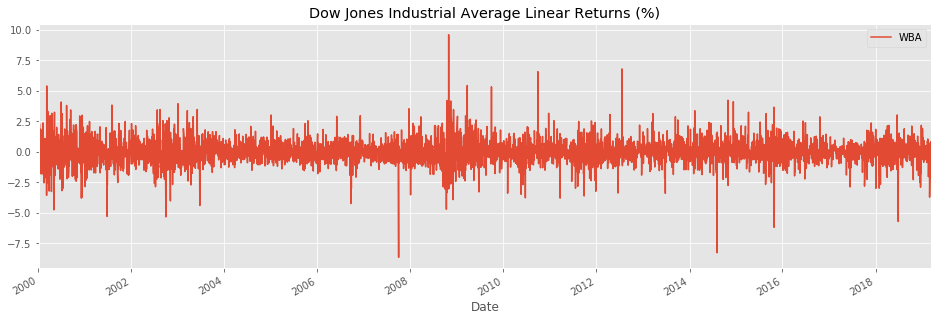

In [22]:
# Visualizing Log Returns for the WBA
plt.figure(figsize=(16, 5))
plt.title("Dow Jones Industrial Average Linear Returns (%)")
data.WBA.plot()
plt.grid(True);
plt.legend()
plt.show()

In [23]:

# Taking away the market benchmark DJIA
stock_tickers = data.columns.values[:-1]


In [24]:
len(data.iloc[:,:-1])

4829

In [25]:
stock_tickers

array(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS',
       'XOM', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK',
       'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'WMT'],
      dtype=object)

In [26]:
len(stock_tickers)

27

In [27]:
n_tickers = len(stock_tickers)
n_tickers

27

In [28]:
len(data)

4829

In [29]:
percentage = int(len(data) * 0.8)
percentage

3863

In [30]:
# Dividing the dataset into training and testing sets
percentage = int(len(data) * 0.8)
X_train = data[:percentage]
X_test = data[percentage:]

X_train_raw = data_raw[:percentage]
X_test_raw = data_raw[percentage:]

In [31]:
X_train

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04 00:00:00+00:00,-2.786217,-1.719263,-3.322962,-0.117645,-0.673057,-0.030900,-2.310860,0.237514,3.095751,-1.286318,...,-1.779897,-2.934502,-2.413491,-1.508352,-0.766055,-2.484249,-0.698031,-2.102414,-2.510999,-2.164103
2000-01-05 00:00:00+00:00,3.494377,-0.251697,0.523309,3.667829,1.831087,1.323881,0.305243,0.822568,1.861031,3.252559,...,0.528007,3.029688,1.150103,-0.673386,0.511298,-0.590229,-0.163536,2.131223,-1.571820,0.503424
2000-01-06 00:00:00+00:00,3.999210,-0.021920,-3.408759,0.109303,1.773282,2.394143,-1.122651,-0.103128,-1.850236,3.702016,...,-1.762966,-0.317527,2.155101,2.663966,0.069920,2.168694,1.802831,-0.347740,0.915887,-1.581718
2000-01-07 00:00:00+00:00,1.338619,0.604844,1.795525,1.497965,1.575592,1.069395,2.387501,5.037378,-0.869704,-0.217613,...,0.659318,-0.041538,4.326357,6.010622,2.162564,2.343821,5.872314,-0.498120,5.014523,1.453952
2000-01-10 00:00:00+00:00,-0.371925,0.625642,-0.729001,-0.779268,-1.655269,-1.715214,1.484993,-2.478202,8.108504,-0.947340,...,0.356456,0.857335,-0.131464,-0.414931,-1.029058,0.559124,-0.923036,-0.359498,-1.233573,1.667379
2000-01-11 00:00:00+00:00,-1.253435,0.384301,-2.033423,-0.874587,-0.809224,-0.614985,-1.237325,2.593163,0.522926,0.762466,...,-1.356207,2.621133,-0.131659,1.216465,-0.653885,-1.420887,0.059816,-0.625202,-1.008471,2.267595
2000-01-12 00:00:00+00:00,0.171520,-0.251963,-2.375248,0.035238,0.824333,-0.253792,-1.045916,0.850385,-3.792151,-0.996056,...,-1.714758,-1.860106,1.378894,-0.539193,0.068800,1.326375,-0.526346,-2.185010,-1.214522,1.186608
2000-01-13 00:00:00+00:00,-0.035162,0.209309,4.215924,-0.874525,0.503377,0.553578,0.927120,-1.197740,1.745593,1.506555,...,0.961579,0.625589,3.393369,-1.319377,1.111690,0.609682,1.539395,-0.525844,0.054031,-0.135916
2000-01-14 00:00:00+00:00,-1.058628,0.984518,1.436845,1.984748,-0.269495,-0.431245,0.522581,0.612702,-1.941448,-1.327519,...,2.120594,1.350557,-0.019946,1.292028,-0.030719,-1.352591,-0.106582,0.847934,-0.662189,-1.455611


In [32]:

# Applying Principle Component Analysis
# Creating covariance matrix and training data on PCA.
from sklearn.decomposition import PCA
cov_matrix = X_train.loc[:,X_train.columns != 'DJIA'].cov()
pca = PCA()
pca.fit(cov_matrix)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [33]:

def plotPCA(plot=False):

    # Visualizing Variance against number of principal components.
    cov_matrix_raw = X_train_raw.loc[:,X_train_raw.columns != 'DJIA'].cov()

    var_threshold = 0.95
    var_explained = np.cumsum(pca.explained_variance_ratio_)
    num_comp = np.where(np.logical_not(var_explained < var_threshold))[0][0] + 1  

    if plot:
        print('%d principal components explain %.2f%% of variance' %(num_comp, 100* var_threshold))

        # PCA percent variance explained.
        bar_width = 0.9
        n_asset = stock_tickers.shape[0]
        x_indx = np.arange(n_asset)
        fig, ax = plt.subplots()

        # Eigenvalues measured as percentage of explained variance.
        rects = ax.bar(x_indx, pca.explained_variance_ratio_[:n_asset], bar_width)
        ax.set_xticks(x_indx + bar_width / 2)
        ax.set_xticklabels(list(range(n_asset)), rotation=45)
        ax.set_title('Percent variance explained')
        ax.set_ylabel('Explained Variance')
        ax.set_xlabel('Principal Components')
        plt.show()

21 principal components explain 95.00% of variance


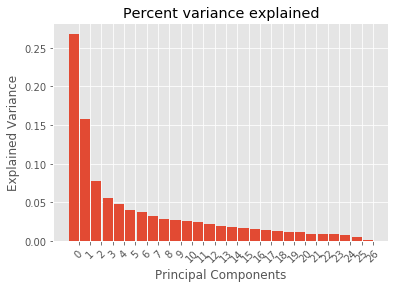

In [34]:
import matplotlib.pyplot as plt
plotPCA(plot=True);

In [35]:

projected = pca.fit_transform(cov_matrix)
pcs = pca.components_
len(pcs)

28

In [36]:
# Sharpe Ratio
def sharpe_ratio(ts_returns, periods_per_year=252):
    '''
    Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
    It calculares the annualized return, annualized volatility, and annualized sharpe ratio.
    
    ts_returns are  returns of a signle eigen portfolio.
    '''
    n_years = ts_returns.shape[0]/periods_per_year
    annualized_return = np.power(np.prod(1+ts_returns),(1/n_years))-1
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

In [37]:
def optimizedPortfolio():
    n_portfolios = len(pcs)
    annualized_ret = np.array([0.] * n_portfolios)
    sharpe_metric = np.array([0.] * n_portfolios)
    annualized_vol = np.array([0.] * n_portfolios)
    highest_sharpe = 0 

    for i in range(n_portfolios):
        
        pc_w = pcs[:, i] / sum(pcs[:, i])
        eigen_prtfi = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
        eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)
        
        eigen_prti_returns = np.dot(X_test_raw.loc[:, eigen_prtfi.index], eigen_prtfi / n_portfolios)
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_test.index)
        er, vol, sharpe = sharpe_ratio(eigen_prti_returns)
        annualized_ret[i] = er
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe

    # find portfolio with the highest Sharpe ratio
    highest_sharpe = np.argmax(sharpe_metric)

    print('Eigen portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f' % 
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100, 
           annualized_vol[highest_sharpe]*100, 
           sharpe_metric[highest_sharpe]))


    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    ax.plot(sharpe_metric, linewidth=3)
    ax.set_title('Sharpe ratio of eigen-portfolios')
    ax.set_ylabel('Sharpe ratio')
    ax.set_xlabel('Portfolios')

    results = pd.DataFrame(data={'Return': annualized_ret, 'Vol': annualized_vol, 'Sharpe': sharpe_metric})
    results.dropna(inplace=True)
    results.sort_values(by=['Sharpe'], ascending=False, inplace=True)
    print(results.head(10))

    plt.show()

optimizedPortfolio()

ValueError: Shape of passed values is (28, 1), indices imply (27, 1)